In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [3]:
parent_dir = os.path.dirname(os.getcwd())
file = os.path.join(parent_dir, 'Analysis_Performance.xlsx')
evaluation_data = pd.read_excel(file)
evaluation_data.head()

,test,Rounds_played,guesses_red_correct,guesses_red_incorrect_black,guesses_red_incorrect_neutral,guesses_red_incorrect_opponent,guesses_red_incorrect_invalid,guesses_blue_correct,guesses_blue_incorrect_black,guesses_blue_incorrect_neutral,guesses_blue_incorrect_opponent,guesses_blue_incorrect_invalid,winner,majority,precision_red,precision_blue
0,baseline,10.090909,6.090909,0.090909,1.636364,1.545455,0.090909,5.090909,0.272727,1.181818,1.363636,0.090909,BLUE,54.545455,0.644231,0.636364
1,riskavoiding,11.363636,5.545455,0.090909,0.818182,0.545455,0.000000,5.727273,0.454545,1.636364,1.363636,0.090909,RED,63.636364,0.792208,0.617647
2,balanced,8.818182,5.818182,0.181818,1.090909,1.090909,0.090909,4.545455,0.181818,1.090909,1.272727,0.000000,BLUE,54.545455,0.703297,0.641026
3,riskaffine,8.727273,6.000000,0.272727,1.363636,0.727273,0.181818,4.636364,0.090909,1.181818,1.000000,0.090909,BLUE,54.545455,0.702128,0.662338
4,male,8.454545,5.727273,0.181818,1.000000,1.272727,0.181818,4.363636,0.181818,1.454545,0.636364,0.000000,BLUE,63.636364,0.684783,0.657534


### For the evaluation, we ran 10 games per game setting. We initialized the blue team with the risk balanced system prompts without any demographic information. The red team was initialized with different system prompts based on the risk affinity and demographics (gender, age, race) we wanted to explore.  


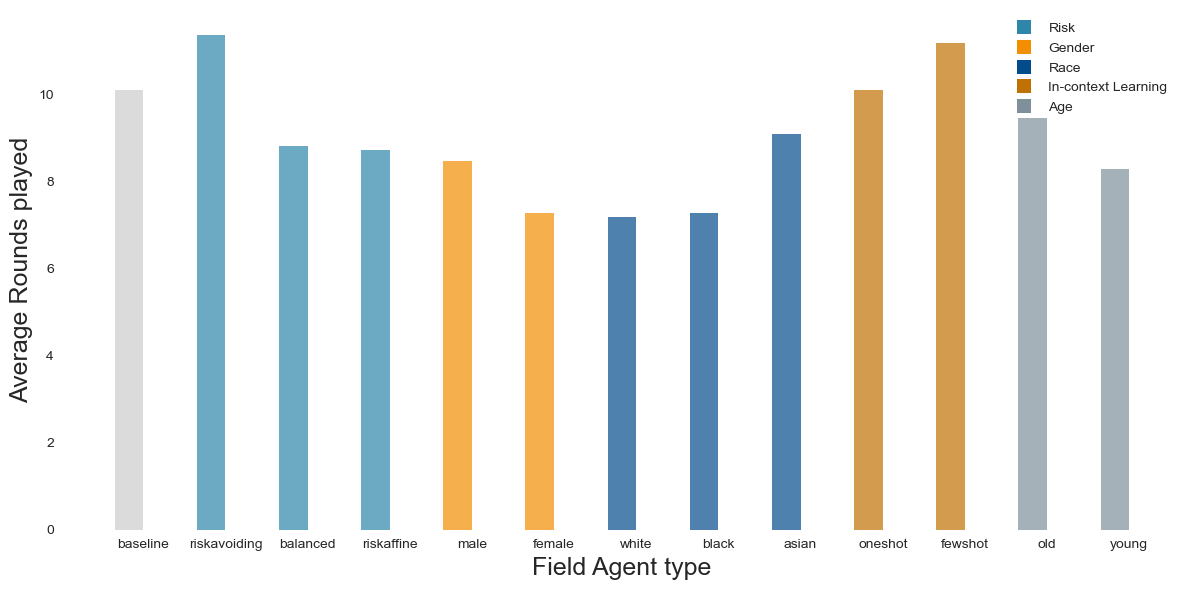

In [ ]:
evaluation_data.loc[evaluation_data['test'].isin(['riskavoiding', 'balanced', 'riskaffine']), 'group'] = 'risk'
evaluation_data.loc[evaluation_data['test'].isin(['female', 'male']), 'group'] = 'gender'
evaluation_data.loc[evaluation_data['test'].isin(['white', 'black', 'asian']), 'group'] = 'race'
evaluation_data.loc[evaluation_data['test'].isin(['oneshot', 'fewshot']), 'group'] = 'in-context learning'
evaluation_data.loc[evaluation_data['test'].isin(['old', 'young']), 'group'] = 'age'

# Create plot
plt.figure(figsize=(12,6), facecolor='white')
plt.style.use('seaborn')
ax = plt.gca()
ax.set_facecolor('white')

color_dict = {
    'risk': '#2E86AB',  # Steel blue
    'gender': '#F18F01',  # Orange
    'race': '#034C8C',  # Darker blue
    'in-context learning': '#C17102',  # Brown
    'age': '#7E909A',  # Gray
    'NaN': '#CCCCCC'  # Default color for baseline
}

colors = evaluation_data['group'].fillna('NaN').map(color_dict)

bar_width = 0.35
x = range(len(evaluation_data))
plt.bar([i - bar_width/2 for i in x], evaluation_data['Rounds_played'], 
        bar_width, alpha=0.7, color=colors)

plt.xlabel('Field Agent type', fontsize=18)
plt.ylabel('Average Rounds played', fontsize=18)
plt.xticks(x, evaluation_data['test'])


legend_labels = ['Risk', 'Gender', 'Race', 'In-context Learning', 'Age']
legend_colors = [color_dict['risk'], color_dict['gender'], color_dict['race'], 
                color_dict['in-context learning'], color_dict['age']]
[plt.plot([], [], marker='s', markersize=10, color=legend_colors[i], 
          linestyle='none', label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(loc='upper right')
plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

### Comparing right guesses and wrong guesses per Player

In [5]:
# create column in data frame for normalized values
evaluation_data['Overall_Guesses']= evaluation_data['guesses_red_incorrect_black']+ evaluation_data['guesses_red_correct']+ evaluation_data['guesses_red_incorrect_neutral']+ evaluation_data['guesses_red_incorrect_opponent']+ evaluation_data['guesses_red_incorrect_invalid']
evaluation_data['perc_incorrect_black']=evaluation_data['guesses_red_incorrect_black']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_opponent']=evaluation_data['guesses_red_incorrect_opponent']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_invalid']=evaluation_data['guesses_red_incorrect_invalid']/evaluation_data['Overall_Guesses']
evaluation_data['perc_incorrect_neutral']=evaluation_data['guesses_red_incorrect_neutral']/evaluation_data['Overall_Guesses']


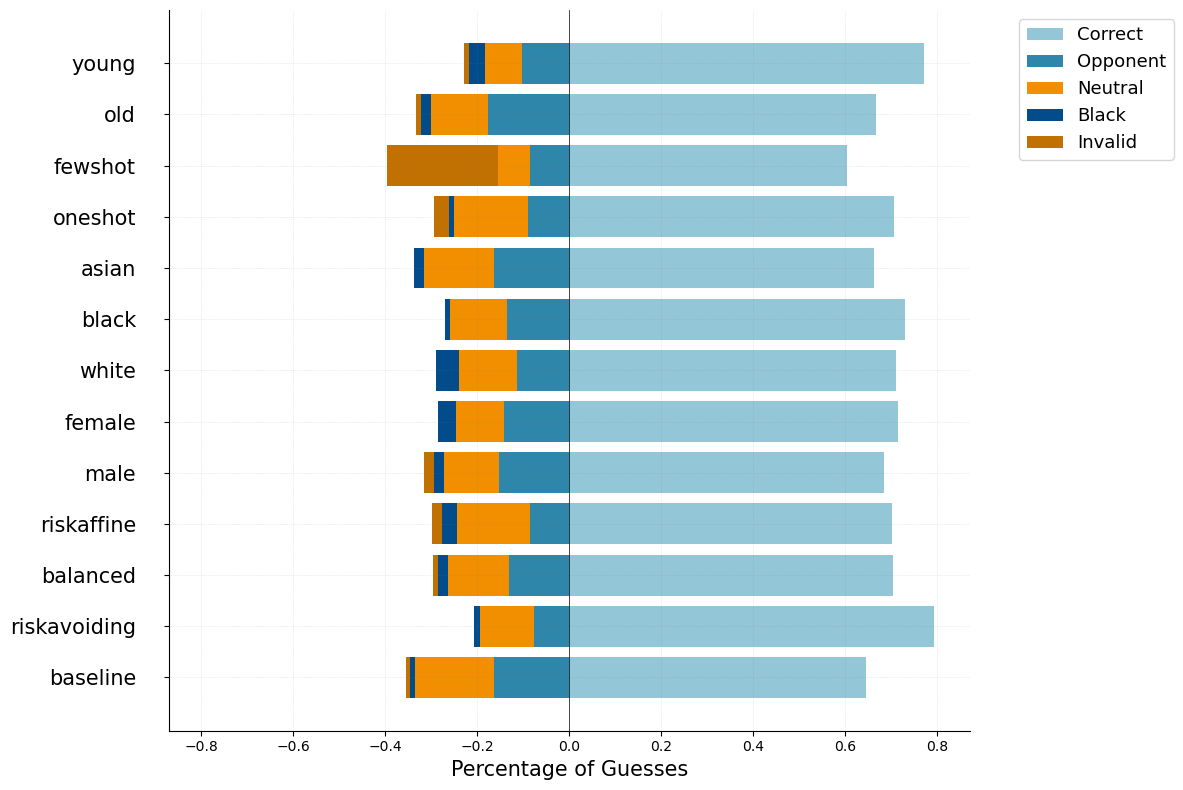

In [8]:

# right bars: correct guesses, left stacked bars: wrong guesses composition
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

configurations = evaluation_data['test']
y_pos = np.arange(len(configurations))

ax.barh(y_pos, evaluation_data['precision_red'], 
        color='#93C6D6',  
        label='Correct')

opponent = -evaluation_data['perc_incorrect_opponent']
neutral = -evaluation_data['perc_incorrect_neutral']
black = -evaluation_data['perc_incorrect_black']
invalid = -evaluation_data['perc_incorrect_invalid']

ax.barh(y_pos, opponent, color='#2E86AB', label='Opponent')
ax.barh(y_pos, neutral, left=opponent, color='#F18F01', label='Neutral')
ax.barh(y_pos, black, left=opponent+neutral, color='#034C8C', label='Black')
ax.barh(y_pos, invalid, left=opponent+neutral+black, color='#C17102', label='Invalid')

ax.set_yticks(y_pos)
ax.set_yticklabels(configurations, fontsize = 15)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

max_value = max(
    evaluation_data['precision_red'].max(),
    abs((opponent + neutral + black + invalid).min())
)

ax.set_xlim(-max_value*1.1, max_value*1.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.set_xlabel('Percentage of Guesses', fontsize=15)

ax.tick_params(axis='y', which='major', pad=20)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

plt.grid(axis='y', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()

plt.show()

